In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import regularizers
tf.__version__

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

from sklearn.model_selection import train_test_split

In [134]:
import scipy
scipy.__version__

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

In [3]:
#!pip install camb

import camb
from camb import model, initialpower

kmin = 1e-4
kmax = 15

(8000, 500)
(8000, 1)
55.000137 84.9965


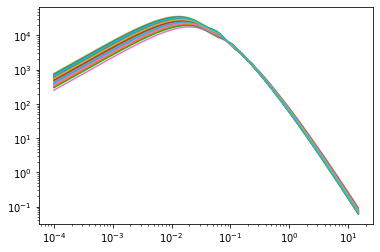

In [4]:
with np.load('input_pk_h0.npy') as data:
    h_lhs = data['H']
    kh = data['k']
    input_pk = data['pk']

print(np.shape(input_pk))
print(np.shape(h_lhs))

for i in range(20):
  plt.loglog(kh, input_pk[i])    

Npoints = len(input_pk[0])  
print(h_lhs.min(), h_lhs.max())

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

xscaler = StandardScaler() #MinMaxScaler()
yscaler = StandardScaler() #MinMaxScaler()

scaled_input = xscaler.fit(h_lhs)
scaled_output = yscaler.fit(input_pk)

norm_x = scaled_input.transform(h_lhs)                               
norm_y = scaled_output.transform(input_pk)

print(norm_x.min(), norm_x.max())

norm_x = pd.DataFrame(norm_x)
norm_y = pd.DataFrame(norm_y)

-1.7320349 1.7316436


In [6]:
x_train, x_test, y_train, y_test = train_test_split(norm_x,
                                                    norm_y,
                                                    test_size=0.1,
                                                    random_state=1273)

np.shape(y_test), np.shape(y_train), np.shape(x_test), np.shape(x_train)

((800, 500), (7200, 500), (800, 1), (7200, 1))

In [189]:
# Working model

input_dim = x_train.shape[1]
output_dim = Npoints

model_nn = Sequential()
model_nn.add(Dense(units=100, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
#model_nn.add(Dropout(0.2))
model_nn.add(Dense(units=100, kernel_initializer='normal', activation='relu'))
model_nn.add(Dropout(0.1))
model_nn.add(Dense(units=100, kernel_initializer='normal', activation='relu'))
model_nn.add(Dropout(0.1))
model_nn.add(Dense(output_dim, kernel_initializer='normal'))

model_nn.summary()


initial_learning_rate = 7e-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.1,
    staircase=True)

#model_nn.compile(loss="mae")
model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
                 loss="mean_squared_error",
                 metrics="Accuracy")
                 #loss=tf.keras.losses.MeanSquaredLogarithmicError())
                 #loss="kl_divergence")
history_nn = model_nn.fit(x_train, y_train, batch_size=50, epochs=250, verbose=1, validation_split=0.2) #validation_data=(x_test, y_test))

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 100)               200       
                                                                 
 dense_97 (Dense)            (None, 100)               10100     
                                                                 
 dropout_23 (Dropout)        (None, 100)               0         
                                                                 
 dense_98 (Dense)            (None, 100)               10100     
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_99 (Dense)            (None, 500)               50500     
                                                                 
Total params: 70,900
Trainable params: 70,900
Non-tra

116/116 [==============================] - 0s 2ms/step - loss: 0.0084 - Accuracy: 0.6727 - val_loss: 9.4630e-04 - val_Accuracy: 0.8160
Epoch 50/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0078 - Accuracy: 0.6847 - val_loss: 0.0017 - val_Accuracy: 0.8382
Epoch 51/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0083 - Accuracy: 0.6854 - val_loss: 0.0024 - val_Accuracy: 0.8014
Epoch 52/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0077 - Accuracy: 0.6878 - val_loss: 0.0013 - val_Accuracy: 0.8750
Epoch 53/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0078 - Accuracy: 0.6964 - val_loss: 0.0020 - val_Accuracy: 0.7722
Epoch 54/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0082 - Accuracy: 0.7045 - val_loss: 0.0028 - val_Accuracy: 0.8028
Epoch 55/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0078 - Accuracy: 0.7019 - val_loss: 0.0021 - val_Accuracy: 0.8618
E

Epoch 106/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0070 - Accuracy: 0.7082 - val_loss: 0.0010 - val_Accuracy: 0.8556
Epoch 107/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0078 - Accuracy: 0.6925 - val_loss: 8.9402e-04 - val_Accuracy: 0.8431
Epoch 108/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0084 - Accuracy: 0.6811 - val_loss: 0.0017 - val_Accuracy: 0.8160
Epoch 109/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0079 - Accuracy: 0.6957 - val_loss: 0.0028 - val_Accuracy: 0.8056
Epoch 110/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0080 - Accuracy: 0.6932 - val_loss: 0.0019 - val_Accuracy: 0.7861
Epoch 111/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0086 - Accuracy: 0.6575 - val_loss: 0.0020 - val_Accuracy: 0.7764
Epoch 112/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0081 - Accuracy: 0.6908 - val_loss: 0.0017 - va

116/116 [==============================] - 0s 2ms/step - loss: 0.0077 - Accuracy: 0.6960 - val_loss: 0.0019 - val_Accuracy: 0.8257
Epoch 163/250
116/116 [==============================] - 0s 3ms/step - loss: 0.0079 - Accuracy: 0.6799 - val_loss: 5.7128e-04 - val_Accuracy: 0.8562
Epoch 164/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0072 - Accuracy: 0.6995 - val_loss: 9.7055e-04 - val_Accuracy: 0.8000
Epoch 165/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0073 - Accuracy: 0.7009 - val_loss: 4.6654e-04 - val_Accuracy: 0.9069
Epoch 166/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0072 - Accuracy: 0.7066 - val_loss: 6.0511e-04 - val_Accuracy: 0.8597
Epoch 167/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0078 - Accuracy: 0.7003 - val_loss: 5.7694e-04 - val_Accuracy: 0.8507
Epoch 168/250
116/116 [==============================] - 0s 3ms/step - loss: 0.0073 - Accuracy: 0.7033 - val_loss: 0.0011 - 

116/116 [==============================] - 0s 2ms/step - loss: 0.0076 - Accuracy: 0.6809 - val_loss: 0.0014 - val_Accuracy: 0.8174
Epoch 219/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0078 - Accuracy: 0.6965 - val_loss: 0.0024 - val_Accuracy: 0.8646
Epoch 220/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0077 - Accuracy: 0.6988 - val_loss: 0.0011 - val_Accuracy: 0.8632
Epoch 221/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0078 - Accuracy: 0.7108 - val_loss: 0.0011 - val_Accuracy: 0.8438
Epoch 222/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0074 - Accuracy: 0.6998 - val_loss: 7.0811e-04 - val_Accuracy: 0.8583
Epoch 223/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0075 - Accuracy: 0.7104 - val_loss: 0.0027 - val_Accuracy: 0.7694
Epoch 224/250
116/116 [==============================] - 0s 2ms/step - loss: 0.0075 - Accuracy: 0.7009 - val_loss: 0.0023 - val_Accuracy: 0.

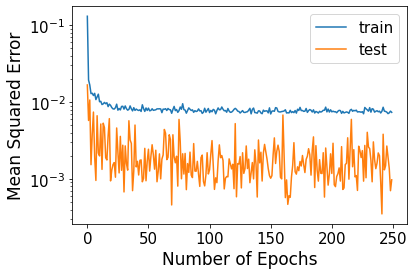

In [190]:
plt.plot(history_nn.history["loss"], label="train")
plt.plot(history_nn.history["val_loss"], label="test")
#plt.xlim([0, 500])
#plt.ylim([0, 0.15])
plt.xlabel("Number of Epochs", fontsize=17)
plt.ylabel("Mean Squared Error", fontsize=17)
plt.yscale("log")
plt.legend(fontsize=15)

In [191]:
s8_fid = 0.8129

HH0 = 67.9
new_H0 = np.reshape(np.array(HH0),(1, 1))
#scaled = xscaler.fit(h_lhs)
#input_scaled = scaled.transform(new_H0/100.0)
new_h = new_H0
input_scaled = scaled_input.transform(new_h)
print(input_scaled)
predicted_pk = scaled_output.inverse_transform(model_nn.predict([input_scaled]))

pars = camb.CAMBparams()
pars.set_cosmology(H0=HH0, ombh2=0.02242, omch2=0.11933)
pars.InitPower.set_params(As=2.105209331e-9, ns=0.9665)
pars.set_matter_power(redshifts=[0.0], kmax=15.0)
pars.set_dark_energy(w=-1.0, wa=0, dark_energy_model='fluid')

# Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, un_pk = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=Npoints)
s8_camb = np.array(results.get_sigma8())
Renorm_Factor = s8_fid**2/s8_camb**2
output_pk_compare = Renorm_Factor * un_pk

[[-0.24248833]]
1/1 [==============================] - 0s 43ms/step


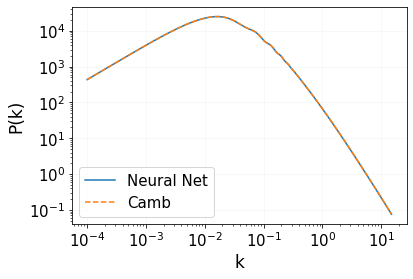

In [192]:
plt.loglog(kh, predicted_pk[0], "C0-", label="Neural Net")
plt.loglog(kh, output_pk_compare[0], "C1--", label="Camb")
plt.ylabel("P(k)", fontsize=17)
plt.xlabel("k", fontsize=17)
#plt.loglog(kh, output_pk_compare_1[0], "C2-.")
plt.legend(fontsize=15)
plt.grid(alpha=0.1)

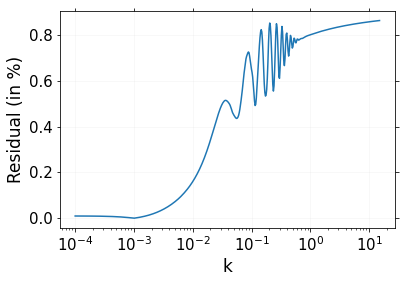

In [193]:
plt.plot(kh, np.abs((predicted_pk[0]-output_pk_compare[0])/output_pk_compare[0])*100)
#plt.plot(kh, np.abs((output_pk_compare_1[0]-output_pk_compare[0])/output_pk_compare[0])*100)
plt.xscale("log")
plt.ylabel("Residual (in %)", fontsize=17)
plt.xlabel("k", fontsize=17)
plt.grid(alpha=0.1)
plt.tick_params(top=True, right=True)

# ICA - Dimensionality reduction

In [111]:
from sklearn.decomposition import FastICA

Ncomponents = 5

transformer = FastICA(n_components=Ncomponents,
                        random_state=0,
                        max_iter=10000)

pk_transformed = transformer.fit_transform(input_pk)

yica_scaler = StandardScaler() #MinMaxScaler()

ica_scaled_output = yica_scaler.fit(pk_transformed)
                              
norm_ica_y = ica_scaled_output.transform(pk_transformed)
print(norm_ica_y.min(), norm_ica_y.max())

norm_ica_y = pd.DataFrame(norm_ica_y)

-5.169468376951814 5.033575255454653


In [112]:
x_ica_train, x_ica_test, y_ica_train, y_ica_test = train_test_split(norm_x,
                                                                    norm_ica_y,
                                                                    test_size=0.2,
                                                                    random_state=1273)

print(np.shape(y_ica_test), np.shape(y_ica_train), np.shape(x_ica_test), np.shape(x_ica_train))


input_ica_dim = x_ica_train.shape[1]
output_ica_dim = Ncomponents

print(input_ica_dim, output_ica_dim)

(1600, 5) (6400, 5) (1600, 1) (6400, 1)
1 5


In [113]:
model_ica_nn = Sequential()
model_ica_nn.add(Dense(units=200, input_dim=input_ica_dim, kernel_initializer='normal', activation='relu'))
model_ica_nn.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
model_ica_nn.add(Dropout(0.1))
model_ica_nn.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
model_ica_nn.add(Dropout(0.1))
model_ica_nn.add(Dense(output_ica_dim, kernel_initializer='normal'))

model_ica_nn.summary()

initial_learning_rate = 1e-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.1,
    staircase=True)


model_ica_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),#1e-3),
                 loss="mean_squared_error",
                 metrics="Accuracy")
history_ica_nn = model_ica_nn.fit(x_ica_train, y_ica_train, batch_size=100, epochs=250, verbose=1, validation_split=0.2) #validation_data=(x_test, y_test))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 200)               400       
                                                                 
 dense_73 (Dense)            (None, 200)               40200     
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 dense_74 (Dense)            (None, 200)               40200     
                                                                 
 dropout_12 (Dropout)        (None, 200)               0         
                                                                 
 dense_75 (Dense)            (None, 5)                 1005      
                                                                 
Total params: 81,805
Trainable params: 81,805
Non-tra

52/52 [==============================] - 0s 3ms/step - loss: 0.0124 - Accuracy: 0.9564 - val_loss: 0.0060 - val_Accuracy: 0.9781
Epoch 51/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0125 - Accuracy: 0.9625 - val_loss: 0.0091 - val_Accuracy: 0.9500
Epoch 52/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0123 - Accuracy: 0.9578 - val_loss: 0.0035 - val_Accuracy: 0.9781
Epoch 53/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0111 - Accuracy: 0.9619 - val_loss: 0.0037 - val_Accuracy: 0.9805
Epoch 54/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0109 - Accuracy: 0.9676 - val_loss: 0.0021 - val_Accuracy: 0.9828
Epoch 55/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0116 - Accuracy: 0.9652 - val_loss: 0.0010 - val_Accuracy: 0.9836
Epoch 56/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0111 - Accuracy: 0.9664 - val_loss: 0.0021 - val_Accuracy: 0.9797
Epoch 57/250
52/52 

52/52 [==============================] - 0s 3ms/step - loss: 0.0091 - Accuracy: 0.9684 - val_loss: 0.0011 - val_Accuracy: 0.9836
Epoch 108/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0084 - Accuracy: 0.9701 - val_loss: 0.0017 - val_Accuracy: 0.9852
Epoch 109/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0092 - Accuracy: 0.9656 - val_loss: 0.0020 - val_Accuracy: 0.9914
Epoch 110/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0092 - Accuracy: 0.9693 - val_loss: 0.0013 - val_Accuracy: 0.9859
Epoch 111/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0087 - Accuracy: 0.9684 - val_loss: 0.0021 - val_Accuracy: 0.9750
Epoch 112/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0087 - Accuracy: 0.9697 - val_loss: 0.0016 - val_Accuracy: 0.9828
Epoch 113/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0088 - Accuracy: 0.9693 - val_loss: 0.0013 - val_Accuracy: 0.9891
Epoch 114/250

52/52 [==============================] - 0s 3ms/step - loss: 0.0082 - Accuracy: 0.9709 - val_loss: 0.0020 - val_Accuracy: 0.9797
Epoch 165/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0085 - Accuracy: 0.9689 - val_loss: 8.5650e-04 - val_Accuracy: 0.9859
Epoch 166/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0086 - Accuracy: 0.9693 - val_loss: 0.0032 - val_Accuracy: 0.9758
Epoch 167/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0081 - Accuracy: 0.9705 - val_loss: 0.0013 - val_Accuracy: 0.9883
Epoch 168/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0079 - Accuracy: 0.9699 - val_loss: 0.0029 - val_Accuracy: 0.9891
Epoch 169/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0086 - Accuracy: 0.9695 - val_loss: 0.0028 - val_Accuracy: 0.9734
Epoch 170/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0088 - Accuracy: 0.9654 - val_loss: 0.0026 - val_Accuracy: 0.9812
Epoch 171

52/52 [==============================] - 0s 3ms/step - loss: 0.0064 - Accuracy: 0.9734 - val_loss: 1.7843e-04 - val_Accuracy: 0.9945
Epoch 221/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0064 - Accuracy: 0.9748 - val_loss: 1.1554e-04 - val_Accuracy: 0.9977
Epoch 222/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0062 - Accuracy: 0.9746 - val_loss: 2.5476e-04 - val_Accuracy: 0.9953
Epoch 223/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0065 - Accuracy: 0.9723 - val_loss: 1.9471e-04 - val_Accuracy: 0.9984
Epoch 224/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0063 - Accuracy: 0.9748 - val_loss: 3.0639e-04 - val_Accuracy: 0.9883
Epoch 225/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0067 - Accuracy: 0.9732 - val_loss: 1.7019e-04 - val_Accuracy: 0.9961
Epoch 226/250
52/52 [==============================] - 0s 3ms/step - loss: 0.0063 - Accuracy: 0.9746 - val_loss: 1.9067e-04 - val_Ac

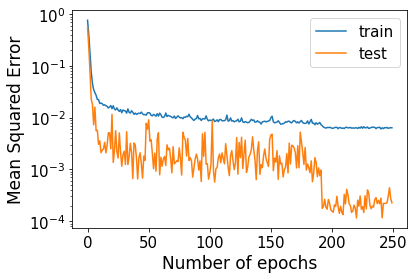

In [166]:
plt.plot(history_ica_nn.history["loss"], label="train")
plt.plot(history_ica_nn.history["val_loss"], label="test")
#plt.xlim([0, 500])
#plt.ylim([0, 0.15])
plt.xlabel("Number of epochs", fontsize=17)
#plt.ylabel("mean absolute error")
plt.ylabel("Mean Squared Error", fontsize=17)
plt.yscale("log")
plt.legend(fontsize=15)

In [194]:
s8_fid = 0.8129

HH0 = 71.3
new_H0 = np.reshape(np.array(HH0),(1, 1))
#scaled = xscaler.fit(h_lhs)
#input_scaled = scaled.transform(new_H0/100.0)
new_h = new_H0
input_scaled = scaled_input.transform(new_h)
print(input_scaled)
predicted_pk = ica_scaled_output.inverse_transform(model_ica_nn.predict([input_scaled]))
inverse_pk = transformer.inverse_transform(predicted_pk)

pars = camb.CAMBparams()
pars.set_cosmology(H0=HH0, ombh2=0.02242, omch2=0.11933)
pars.InitPower.set_params(As=2.105209331e-9, ns=0.9665)
pars.set_matter_power(redshifts=[0.0], kmax=15.0)
pars.set_dark_energy(w=-1.0, wa=0, dark_energy_model='fluid')

# Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, un_pk = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=Npoints)
s8_camb = np.array(results.get_sigma8())
Renorm_Factor = s8_fid**2/s8_camb**2
output_pk_compare_ica = Renorm_Factor * un_pk

[[0.15010952]]
1/1 [==============================] - 0s 13ms/step


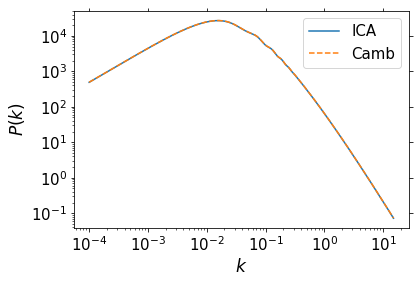

In [195]:
plt.loglog(kh, inverse_pk[0], "C0-", label="ICA")
plt.loglog(kh, output_pk_compare_ica[0], "C1--", label="Camb")
plt.ylabel("$P(k)$", fontsize=17)
plt.xlabel("$k$", fontsize=17)
plt.legend(fontsize=15)
plt.tick_params(top=True, right=True)

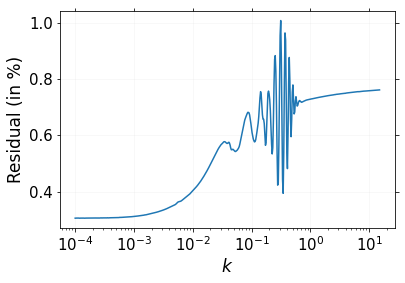

In [196]:
plt.plot(kh, np.abs((inverse_pk[0]-output_pk_compare_ica[0])/output_pk_compare_ica[0])*100)
plt.xscale("log")
plt.grid(alpha=0.1)
plt.ylabel("Residual (in %)", fontsize=17)
plt.xlabel("$k$", fontsize=17)
plt.tick_params(top=True, right=True)